# Plots the Results of Tasks

## Task1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
f = open('../results/Task1.out')
res = []
for line in f:
    if len(line) > 2:
        res.append(list(map(lambda x: float(x), line[:-1].split(' '))))
f.close()

res = np.asarray(res[:60])

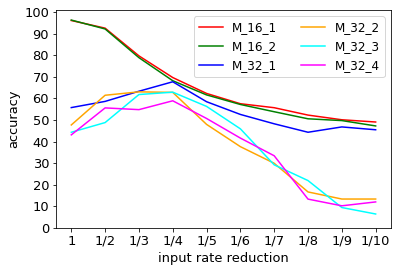

In [17]:
color = ['red', 'green', 'blue', 'orange', 'cyan', 'magenta']

fig, ax = plt.subplots()
for i in range(6):
    tmp = res[i::6]
    x = tmp[:,0]
    y = tmp[:,1]
    ax.plot(x, y, color[i])

x_ticks = np.arange(100, 1100, 100)
y_ticks = np.arange(0, 110, 10)
xlabels = ['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8', '1/9', '1/10']
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(xlabels)
ax.set_ylabel('accuracy', fontsize = 13)
ax.set_xlabel('input rate reduction', fontsize = 13)
ax.legend(['M_16_1', 'M_16_2', 'M_32_1', 'M_32_2', 'M_32_3', 'M_32_4'], ncol = 2, fontsize = 12)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()



fig.savefig('accuracy_1.pdf', bbox_inches='tight', pad_inches=0.0)

## Task2

In [18]:
f = open('../results/Task2.out')
res = []
for line in f:
    if len(line) > 2:
        res.append(line[:-1].split(' '))
f.close()

f = open('../results/Task2_estimation.out')
est = []
for line in f:
    if len(line) > 2:
        est.append(line[:-1].split(' '))
f.close()

In [19]:
est = np.array(est)
est = est.astype(np.float64)
res = np.array(res)
res = res[:, 1:]
res = res.astype(np.float64)

[0.98765464 1.         1.         1.         1.        ]
[0.93663929 0.88734168 0.954545   0.87692338 1.        ]
[0.9192821  0.86943783 0.81538438 0.88235349 1.        ]
[0.92108094 0.83921553 0.82089575 1.         1.        ]


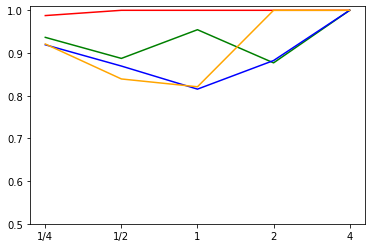

In [20]:
x = np.array(['1/4', '1/2', '1', '2', '4'])
for i in range(4):
    tmp = res[i*5:i*5+5, 7] / est[i*5:i*5+5, 3]
    print(tmp)
    plt.plot(x, tmp, color[i])
y_ticks = np.arange(0.5, 1.05, 0.1)
plt.yticks(y_ticks)
plt.show()

[1.0125 1.     1.     1.     1.    ]
[1.06764706 1.11627907 1.04761905 1.         1.        ]
[1.08780488 1.14563107 1.22641509 1.13333333 1.        ]
[1.08568075 1.19158879 1.21818182 1.         1.        ]


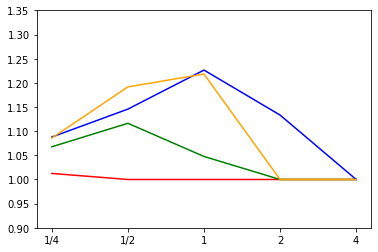

In [21]:
for i in range(4):
    tmp = res[i*5:i*5+5, 6] / est[i*5:i*5+5, 2]
    print(tmp)
    plt.plot(x, tmp, color[i])
y_ticks = np.arange(0.9, 1.40, 0.05)
plt.yticks(y_ticks)
plt.show()

[0.98765464 1.         1.         1.         1.        ]
[0.93663929 0.88734168 0.954545   0.87692338 1.        ]
[0.9192821  0.86943783 0.81538438 0.88235349 1.        ]
[0.92108094 0.83921553 0.82089575 1.         1.        ]


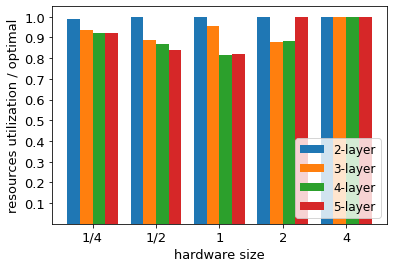

In [23]:
# resources utilization / optimal
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 7] / est[i*5:i*5+5, 3]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
y_ticks = np.arange(0.1, 1.05, 0.1)
#y_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticks(y_ticks)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], loc = 4, fontsize = 12)
#ax.set_yticklabels(y_labels)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('resources utilization / optimal', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()


fig.savefig('optimal_2.pdf', bbox_inches='tight', pad_inches=0.0)

[1.94117647 1.47058824 1.23529412 1.11764706 1.        ]
[4.23809524 2.61904762 1.76190476 1.38095238 1.        ]
[6.65517241 3.82758621 2.37931034 1.55172414 1.        ]
[6.48387097 3.70967742 2.29032258 1.51612903 1.        ]


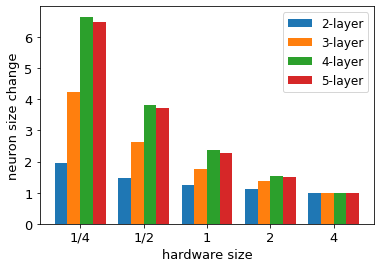

In [24]:
# number of neuron after unrolling
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 3] / res[i*5:i*5+5, 2]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('neuron size change', fontsize = 13)


plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()


fig.savefig('unrolling_4.pdf', bbox_inches='tight', pad_inches=0.0)

[1.0125 1.     1.     1.     1.    ]
[1.06764706 1.11627907 1.04761905 1.         1.        ]
[1.08780488 1.14563107 1.22641509 1.13333333 1.        ]
[1.08568075 1.19158879 1.21818182 1.         1.        ]


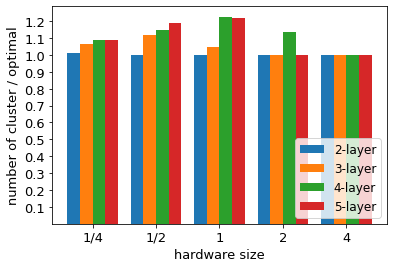

In [25]:
# number of cluster / optimal
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 6] / est[i*5:i*5+5, 2]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
y_ticks = np.arange(0.1, 1.3, 0.1)
ax.set_yticks(y_ticks)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.set_xticklabels(labels)
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], loc = 4, fontsize = 12)
ax.set_xlabel('hardware size', fontsize =13)
ax.set_ylabel('number of cluster / optimal', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()


fig.savefig('optimal_1.pdf', bbox_inches='tight', pad_inches=0.0)

[0.109495 0.09905  0.110722 0.096501 0.012818]
[0.747132 0.618586 0.483611 0.564057 0.089601]
[1.66218  1.41612  1.41837  0.968896 0.249601]
[1.70444  2.24737  1.51736  1.00408  0.310235]


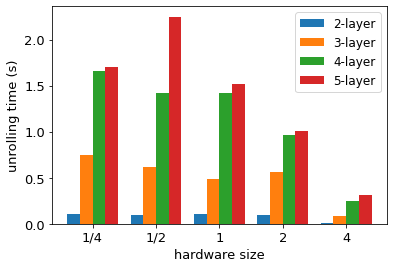

In [27]:
#unrolling time
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 1]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('unrolling time (s)', fontsize = 13)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()


fig.savefig('unrolling_1.pdf', bbox_inches='tight', pad_inches=0.0)

[2112. 1600. 1344. 1216. 1088.]
[5696. 3520. 2368. 1856. 1344.]
[12352.  7104.  4416.  2880.  1856.]
[12864.  7360.  4544.  3008.  1984.]


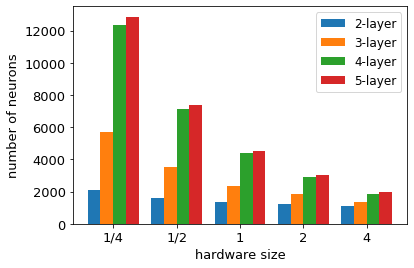

In [28]:
# number of neuron after unrolling
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 3]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('number of neurons', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()

fig.savefig('unrolling_3.pdf', bbox_inches='tight', pad_inches=0.0)

[1.67076111e-06 1.51138306e-06 1.68948364e-06 1.47248840e-06
 1.95587158e-07]
[2.68243049e-06 2.22091136e-06 1.73631017e-06 2.02513571e-06
 3.21694767e-07]
[2.47442478e-06 2.10812452e-06 2.11147401e-06 1.44235899e-06
 3.71571611e-07]
[2.44778263e-06 3.22749598e-06 2.17911305e-06 1.44198070e-06
 4.45535099e-07]


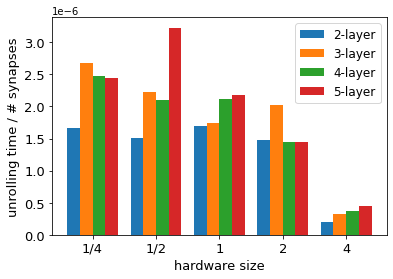

In [31]:
# unrolling time per synapse
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
synapse = [65536, 278528, 671744, 696320]
for i in range(4):
    tmp = res[i*5:i*5+5, 1] / (synapse[i])
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#y_ticks = np.arange(0.1, 1.3, 0.1)
#ax.set_yticks(y_ticks)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('unrolling time / # synapses', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()

fig.savefig('unrolling_2.pdf', bbox_inches='tight', pad_inches=0.0)

[37.1582  14.2308   4.72697  2.84218  0.6893 ]
[325.292  103.725   36.7451  13.8188   2.8391]
[1997.68    451.124   138.049    51.2287   42.3462]
[2204.31    575.342   148.892    51.1561   43.2735]


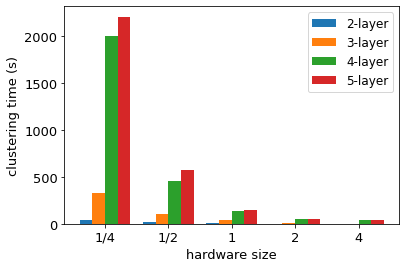

In [30]:
# cluster time
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 5]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#y_ticks = np.arange(0.1, 1.3, 0.1)
#ax.set_yticks(y_ticks)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('clustering time (s)', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()


fig.savefig('clustering_1.pdf', bbox_inches='tight', pad_inches=0.0)

[81. 20.  5.  3.  1.]
[363.  96.  22.   7.   2.]
[892. 236.  65.  17.   4.]
[925. 255.  67.  16.   5.]


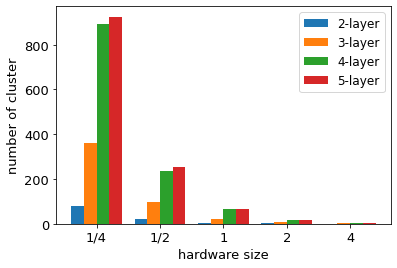

In [29]:
# number of cluster

width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 6]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#y_ticks = np.arange(0.1, 1.3, 0.1)
#ax.set_yticks(y_ticks)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.legend(['2-layer', '3-layer', '4-layer', '5-layer'], fontsize = 12)
ax.set_xticklabels(labels)
ax.set_xlabel('hardware size', fontsize = 13)
ax.set_ylabel('number of cluster', fontsize = 13)

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()

fig.savefig('clustering_2.pdf', bbox_inches='tight', pad_inches=0.0)

[0.45874321 0.71154    0.945394   0.94739333 0.6893    ]
[0.89612121 1.08046875 1.67023182 1.97411429 1.41955   ]
[ 2.23955157  1.91154237  2.12383077  3.01345294 10.58655   ]
[2.38303784 2.25624314 2.22226866 3.19725625 8.6547    ]


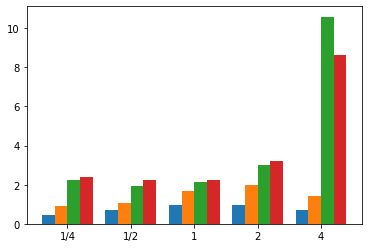

In [14]:
# clustertime / number of cluster

width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(4):
    tmp = res[i*5:i*5+5, 5] / res[i*5:i*5+5, 6]
    print(tmp)
    ax.bar(x - (3 - 2 * i) / 4 * width, tmp, width / 2)
#y_ticks = np.arange(0.1, 1.3, 0.1)
#ax.set_yticks(y_ticks)
#x_ticks = np.arange(0.4, 5.4, 1)
ax.set_xticks(x)
labels = ['1/4', '1/2', '1', '2', '4']
ax.set_xticklabels(labels)
plt.show()

## Task3

In [80]:
f = open('../results/Task3.out')
res = []
for line in f:
    if len(line) > 2:
        res.append(line[:-1].split(' '))
f.close()
res = np.array(res)
name = ['M_16_1','M_16_2','M_32_1','M_32_2','M_32_3','M_32_4','FMNIST','SVHN','CIFAR','EuroSAT']
data = res[:10, 1:].astype(np.float64)
acc = np.array([96.97, 96.97, 89.83, 92.46, 94.51, 96.12, 85.74, 70.20, 76.21, 67.67])
energy_spike = 50
energy_routing = 147

In [81]:
data[:,0]

array([  1.,   2.,   5.,   6.,  22.,  24.,  31.,  47., 100., 123.])

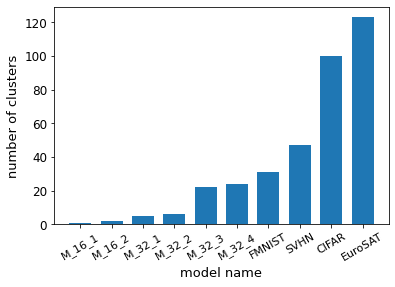

In [135]:
#number of cluster
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,0], width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)

ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('number of clusters', fontsize = 13)


plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)

plt.show()

fig.savefig('metrics_1.pdf', bbox_inches='tight', pad_inches=0.0)

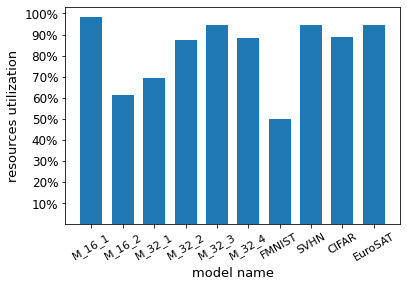

In [134]:
#resource utilization
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,1], width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)


y_ticks = np.arange(0.1, 1.05, 0.1)
y_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('resources utilization', fontsize = 13)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)


plt.show()
fig.savefig('metrics_2.pdf', bbox_inches='tight', pad_inches=0.0)

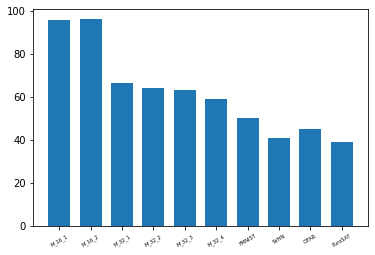

In [84]:
# accuracy
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,3], width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30, fontsize = 5)
plt.show()

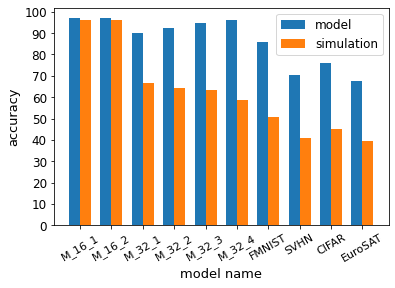

In [133]:
# accuracy vs ideal
width = 0.35
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x - width / 2, acc, width)
ax.bar(x + width / 2, data[:,3], width)

y_ticks = np.arange(0, 110, 10)
ax.set_yticks(y_ticks)

ax.legend(['model', 'simulation'], fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(name,rotation=30)


ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('accuracy', fontsize = 13)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)

plt.show()

fig.savefig('accuracy_2.pdf', bbox_inches='tight', pad_inches=0.0)

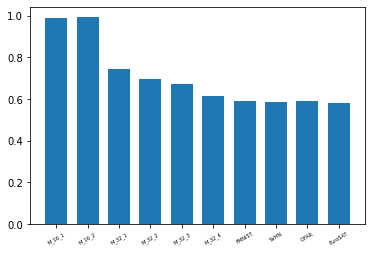

In [86]:
# accuracy
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,3] / acc, width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30, fontsize = 5)
plt.show()

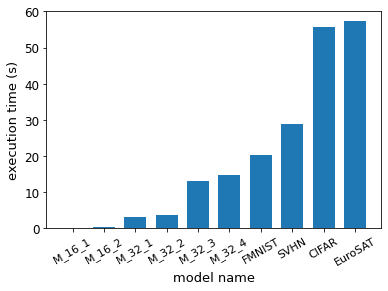

In [132]:
# average running time
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,4], width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)

ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('execution time (s)', fontsize = 13)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)

plt.show()

fig.savefig('metrics_3.pdf', bbox_inches='tight', pad_inches=0.0)

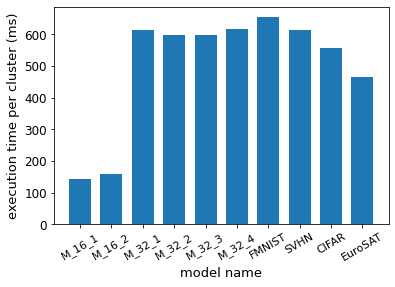

In [129]:
# latency per cluster
width = 0.7
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,4] / data[:, 0] * 1000, width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)
ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('execution time per cluster (ms)', fontsize = 13)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)


plt.show()
fig.savefig('metrics_4.pdf', bbox_inches='tight', pad_inches=0.0)

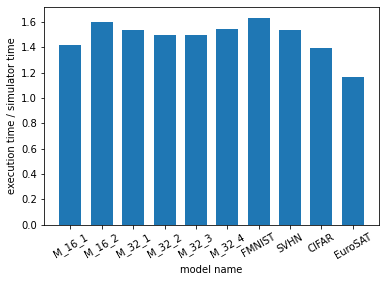

In [89]:
# latency per cluster
width = 0.7
run_time = np.array([0.1, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data[:,4] / data[:, 0] / run_time, width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)

ax.set_xlabel('model name')
ax.set_ylabel('execution time / simulator time')

plt.show()

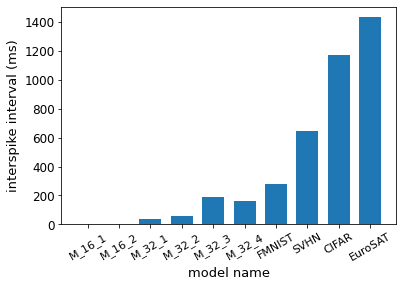

In [130]:
#interspike interval
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, (data[:,4] * 1e6) / data[:,6], width)

y = np.arange(0, 1600, 200)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)

ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('interspike interval (ms)', fontsize = 13)

plt.show()
fig.savefig('metrics_5.pdf', bbox_inches='tight', pad_inches=0.0)

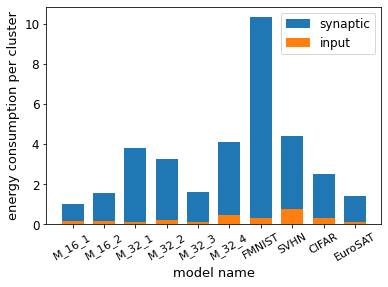

In [131]:
#energy consumption
e_spike = data[:, 7] / data[:, 0]
e_routing = data[:, 8] / data[:, 0]

x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, (e_spike * energy_spike + e_routing * energy_routing) / (data[0, 7] * energy_spike + data[0, 8] * energy_routing), width)
ax.bar(x, e_spike * energy_spike / (data[0, 7] * energy_spike + data[0, 8] * energy_routing), width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30)

ax.set_xlabel('model name', fontsize = 13)
ax.set_ylabel('energy consumption per cluster', fontsize = 13)

ax.legend(['synaptic', 'input'], fontsize = 12)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 11)

plt.show()
fig.savefig('metrics_6.pdf', bbox_inches='tight', pad_inches=0.0)

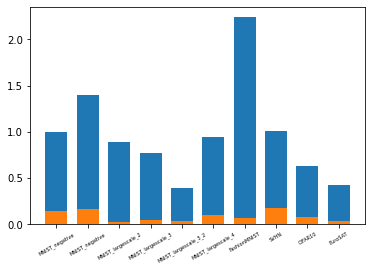

In [27]:
#power
e_spike = data[:, 7]
e_routing = data[:, 8]

x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, (e_spike * energy_spike + e_routing * energy_routing) / (data[:,4]) / ((data[0, 7] * energy_spike + data[0, 8] * energy_routing) / data[0, 4]), width)
ax.bar(x, e_spike * energy_spike / (data[:,4]) / ((data[0, 7] * energy_spike + data[0, 8] * energy_routing) / data[0, 4]), width)
ax.set_xticks(x)
ax.set_xticklabels(name, rotation=30, fontsize = 5)
plt.show()

## Task4

In [3]:
f = open('../results/Task4.out')
res = []
for line in f:
    if len(line) > 2:
        res.append(line[:-1].split(' '))
f.close()
res = np.array(res)[:150,]
res

array([['0', 'MNIST_negative', '1', ..., '12.8983', '45.0731', '12.8947'],
       ['1', 'MNIST_negative', '1', ..., '8.08529', '45.1591', '8.082'],
       ['2', 'MNIST_negative', '1', ..., '8.15954', '45.2333', '8.15601'],
       ...,
       ['2', 'SVHN', '47', ..., '1164.21', '5930.6', '1164.05'],
       ['3', 'SVHN', '47', ..., '1164.88', '6128.03', '1164.72'],
       ['4', 'SVHN', '47', ..., '1168.72', '5919.16', '1168.56']],
      dtype='<U20')

In [4]:
data = res[:,2:].astype(np.float64)
name = ['M_16_1','M_16_2','M_32_2','M_32_3','FMNIST','SVHN']
#name = [res[:,1]]
#name[6::30] = name[7::30] = name[8::30] = name[9::30] = name[10::30] = 'MNIST_negative_2'
strategy = ['roundrobin', 'HRRN', 'random', 'weighted', 'FCFS']
avg = [[], [], [], [], []]
std = [[], [], [], [], []]
for i in range(0, 5):
    for j in range(0, 6):
        tmp = [0,0,0,0,0]
        for k in range(0, 5):
            for l in range(1, 5):
                tmp[l-1] += data[i*30+j*5+k, l]
        avg[i].append(tmp)
        tmp_2 = [0,0,0,0,0]
        for k in range(0, 5):
            for l in range(1, 5):
                tmp_2[l-1] += (data[i*30+j*5+k, l] - tmp[l-1] / 5) ** 2
        std[i].append(tmp_2)
                
                
avg = np.array(avg) / 5
std = np.sqrt(np.array(std) / 5)

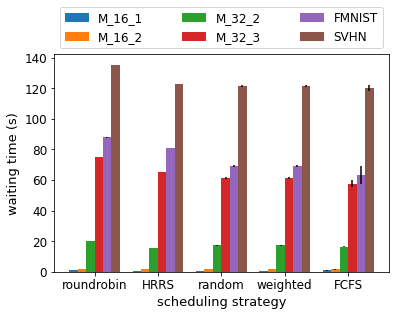

In [138]:
#request wating time: average waiting time
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    #print(tmp_avg, tmp_std)
    tmp_avg = avg[:,i,0] / 50
    tmp_std = std[:,i,0] / 50
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp_avg, width / 3, yerr = tmp_std)
ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('waiting time (s)', fontsize = 13)

plt.show()

fig.savefig('schedule_1.pdf', bbox_inches='tight', pad_inches=0.0)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

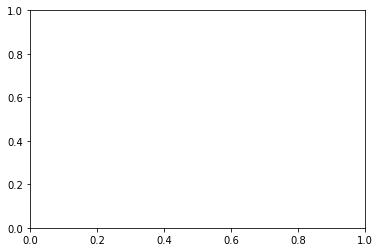

In [139]:
#request wating time: waiting time per cluster (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = avg[:,i,0] / data[i * 5, 0]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

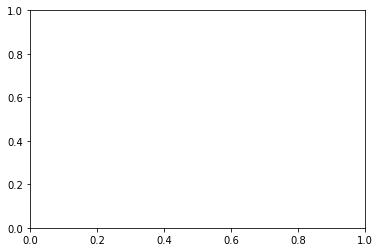

In [140]:
#request wating time: average stadard deviation
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = std[:,i,0]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

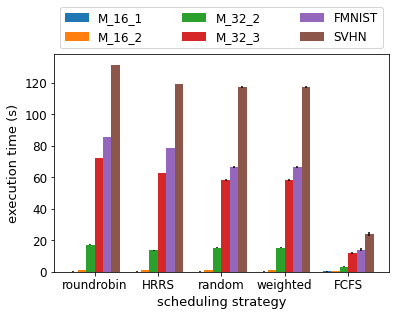

In [141]:
#request execution time: average execution time
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp_avg = avg[:,i,1] / 50
    tmp_std = std[:,i,1] / 50
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp_avg, width / 3, yerr = tmp_std)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('execution time (s)', fontsize = 13)

plt.show()

fig.savefig('schedule_2.pdf', bbox_inches='tight', pad_inches=0.0)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

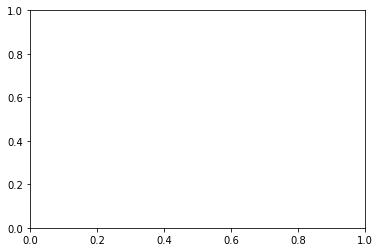

In [142]:
#request execution time: execution time per cluster (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = avg[:,i,1] / data[i * 5, 0]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

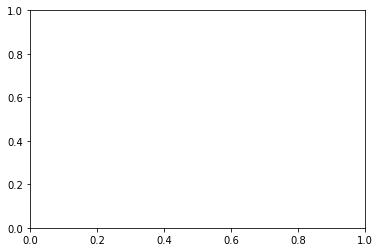

In [143]:
#request execution time: average stadard deviation
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = std[:,i,1]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

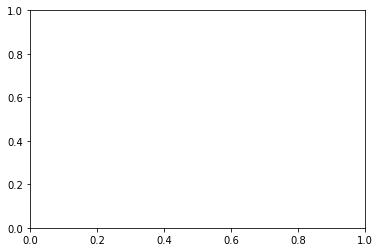

In [144]:
#cluster wating time: average waiting time (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = avg[:,i,2]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

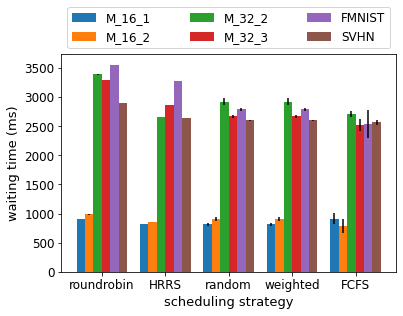

In [145]:
#cluster wating time: waiting time per cluster
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp = avg[:,i,2] / data[i * 5, 0] * 20
    tmp_2 = std[:,i,2] / data[i * 5, 0] * 20
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3, yerr = tmp_2)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('waiting time (ms)', fontsize = 13)

plt.show()

fig.savefig('schedule_3.pdf', bbox_inches='tight', pad_inches=0.0)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

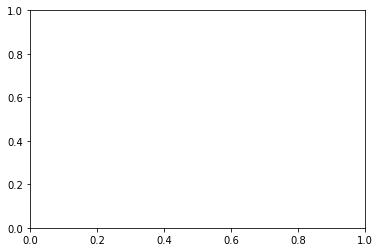

In [146]:
#cluster waiting time: average stadard deviation (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = std[:,i,2]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

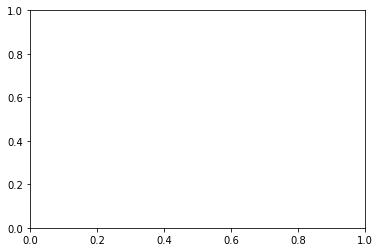

In [147]:
#cluster execution time: average execution time (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = avg[:,i,3]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

[ 9.06266   8.159964  8.567094  8.567094 10.054726]
[19.6821  16.96016 19.07372 19.07372 17.65618]
[202.3246 158.5922 176.5654 176.5654 165.2444]
[750.2248 650.3392 611.7134 611.7134 596.1852]
[882.772  813.4508 698.2906 698.2906 701.1592]
[1339.596 1215.184 1201.564 1201.564 1204.16 ]


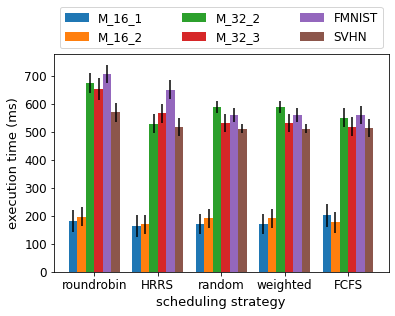

In [150]:
#cluster execution time: execution time per cluster 
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    print(avg[:,i,3])
    tmp = avg[:,i,3] / data[i * 5, 0] * 20
    tmp_2 = std[:,i,3] / data[i * 5, 0] * 20
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3, yerr = tmp_2)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('execution time (ms)', fontsize = 13)

plt.show()

fig.savefig('schedule_4.pdf', bbox_inches='tight', pad_inches=0.0)

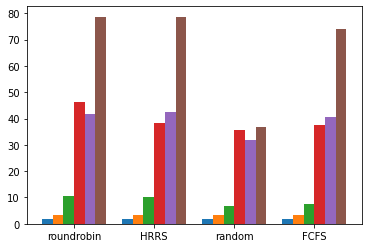

In [66]:
#cluster execution time: average stadard deviation (meaning less)
width = 0.4
x = np.arange(1, 5)
fig, ax = plt.subplots()
for i in range(6):
    tmp = std[:,i,3]
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
ax.set_xticks(x)
ax.set_xticklabels(strategy)
plt.show()

## Task5

In [5]:
f = open('../results/Task4.out')
res = []
for line in f:
    if len(line) > 2:
        res.append(line[:-1].split(' '))
f.close()
res = np.array(res)[150:180,]
res

array([['0', 'MNIST_negative', '1', '746.976', '11.5554', '746.976',
        '11.5527'],
       ['1', 'MNIST_negative_2', '2', '858.238', '539.133', '859.333',
        '23.2606'],
       ['2', 'MNIST_largescale_3', '6', '1279.7', '1128.71', '1285.07',
        '182.79'],
       ['3', 'MNIST_largescale_3_2', '23', '2656.43', '2542.17',
        '2673.81', '707.439'],
       ['4', 'FashionMNIST', '25', '2770.57', '2634.98', '2783.83',
        '815.578'],
       ['5', 'SVHN', '47', '3450.02', '3219.75', '3461.26', '1533.29'],
       ['0', 'MNIST_negative', '1', '622.117', '12.3322', '622.117',
        '12.33'],
       ['1', 'MNIST_negative_2', '2', '703.408', '416.435', '703.732',
        '23.9027'],
       ['2', 'MNIST_largescale_3', '6', '1238.08', '1090.8', '1243.06',
        '178.209'],
       ['3', 'MNIST_largescale_3_2', '23', '2502.56', '2393.69',
        '2520.09', '661.188'],
       ['4', 'FashionMNIST', '25', '2616.31', '2484.12', '2628.85',
        '765.379'],
       ['5', 'SVHN'

In [6]:
data = res[:,2:].astype(np.float64)
data

array([[1.00000e+00, 7.46976e+02, 1.15554e+01, 7.46976e+02, 1.15527e+01],
       [2.00000e+00, 8.58238e+02, 5.39133e+02, 8.59333e+02, 2.32606e+01],
       [6.00000e+00, 1.27970e+03, 1.12871e+03, 1.28507e+03, 1.82790e+02],
       [2.30000e+01, 2.65643e+03, 2.54217e+03, 2.67381e+03, 7.07439e+02],
       [2.50000e+01, 2.77057e+03, 2.63498e+03, 2.78383e+03, 8.15578e+02],
       [4.70000e+01, 3.45002e+03, 3.21975e+03, 3.46126e+03, 1.53329e+03],
       [1.00000e+00, 6.22117e+02, 1.23322e+01, 6.22117e+02, 1.23300e+01],
       [2.00000e+00, 7.03408e+02, 4.16435e+02, 7.03732e+02, 2.39027e+01],
       [6.00000e+00, 1.23808e+03, 1.09080e+03, 1.24306e+03, 1.78209e+02],
       [2.30000e+01, 2.50256e+03, 2.39369e+03, 2.52009e+03, 6.61188e+02],
       [2.50000e+01, 2.61631e+03, 2.48412e+03, 2.62885e+03, 7.65379e+02],
       [4.70000e+01, 3.18158e+03, 2.95871e+03, 3.19297e+03, 1.37057e+03],
       [1.00000e+00, 7.45256e+02, 1.13438e+01, 7.45256e+02, 1.13412e+01],
       [2.00000e+00, 8.63413e+02, 5.95

[14.93952 12.44234 14.90512 75.4928  28.3242 ]
[17.16476 14.06816 17.26826 73.2386  23.4236 ]
[25.594  24.7616 25.7434 72.7634 70.08  ]
[53.1286 50.0512 60.8408 73.7406 61.939 ]
[55.4114 52.3262 63.2566 74.6016 71.6724]
[69.0004 63.6316 75.4564 75.2278 69.6428]


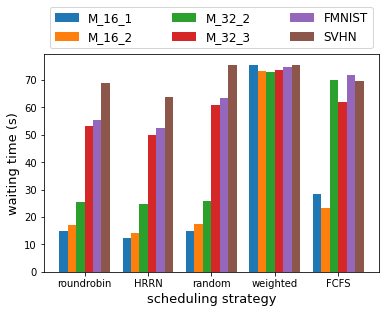

In [7]:
#waiting time request
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp = data[i::6,1] / 50
    print(tmp)
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
    
ax.set_xticks(x)
ax.set_xticklabels(strategy)

ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('waiting time (s)', fontsize = 13)

plt.show()

fig.savefig('schedule_5.pdf', bbox_inches='tight', pad_inches=0.0)

[0.231108 0.246644 0.226876 0.268038 0.248504]
[10.78266   8.3287   11.9027   33.5408    0.476824]
[22.5742  21.816   18.08898 56.9478   4.06896]
[50.8434  47.8738  58.1306  63.0316  15.20202]
[52.6996 49.6824 61.4184 60.4848 17.66  ]
[64.395  59.1742 70.9288 72.0344 30.4632]


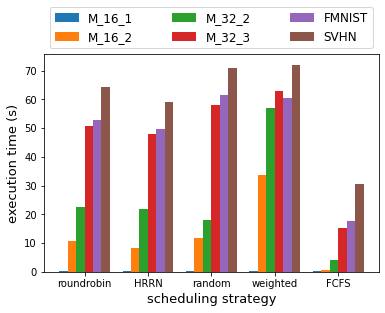

In [9]:
#execution time request
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp = data[i::6,2] / 50
    print(tmp)
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
    
ax.set_xticks(x)
ax.set_xticklabels(strategy)

ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('execution time (s)', fontsize = 13)

plt.show()

fig.savefig('schedule_6.pdf', bbox_inches='tight', pad_inches=0.0)

[ 3.73488   3.110585  3.72628  18.8732    7.08105 ]
[2.1483325 1.75933   2.1601025 9.15705   2.9281   ]
[1.07089167 1.03588333 1.07686667 3.046175   2.92116667]
[0.58126304 0.54784565 0.66483478 0.8057087  0.67467826]
[0.556766 0.52577  0.634914 0.749364 0.718292]
[0.36821915 0.33967766 0.40268511 0.4015117  0.37176383]


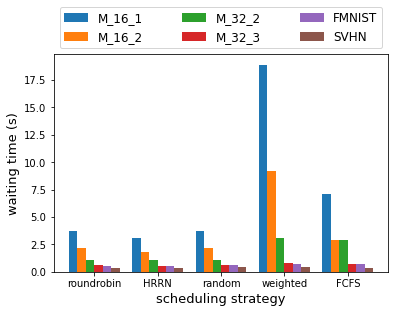

In [8]:
#waiting time cluster
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp = data[i::6,3] / data[i::6,0] / 200
    print(tmp)
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
    
ax.set_xticks(x)
ax.set_xticklabels(strategy)

ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('waiting time (s)', fontsize = 13)

plt.show()

fig.savefig('schedule_7.pdf', bbox_inches='tight', pad_inches=0.0)

[231.054 246.6   226.824 267.976 248.442]
[232.606 239.027 246.943 265.622 238.347]
[609.3        594.03       648.61333333 701.8        678.06      ]
[615.16434783 574.94608696 723.88       691.89913043 660.8626087 ]
[652.4624 612.3032 748.2152 722.9904 706.3128]
[652.46382979 583.2212766  680.68085106 687.42978723 648.06382979]


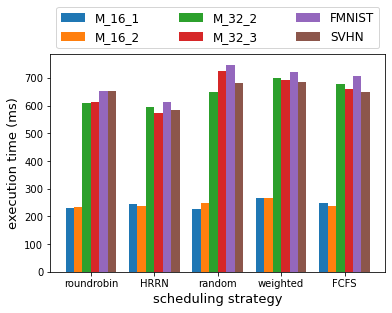

In [10]:
#waiting time cluster
width = 0.4
x = np.arange(1, 6)
fig, ax = plt.subplots()
for i in range(6):
    tmp = data[i::6,4] / data[i::6,0] * 20
    print(tmp)
    ax.bar(x - (5 - 2 * i) / 6 * width, tmp, width / 3)
    
ax.set_xticks(x)
ax.set_xticklabels(strategy)

ax.legend(name, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3, fontsize = 12)
ax.set_xlabel('scheduling strategy', fontsize = 13)
ax.set_ylabel('execution time (ms)', fontsize = 13)

plt.show()

fig.savefig('schedule_8.pdf', bbox_inches='tight', pad_inches=0.0)

# dataset

In [12]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

dataset_dir = '../model/Datasets'

In [78]:
dataset_MNIST = torchvision.datasets.MNIST(
        root=dataset_dir,
        train=False,
        download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
            ])
        )

dataset_FashionMNIST = torchvision.datasets.FashionMNIST(
        root=dataset_dir,
        train=False,
        download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
        ])
    )

dataset_SVHN = torchvision.datasets.SVHN(
        root=dataset_dir,
        split="test",
        download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
        ])
    )

dataset_CIFAR = torchvision.datasets.CIFAR10(
        root=dataset_dir,
        train=False,
        download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
        ])
    )

dataset_EuroSAT = torchvision.datasets.EuroSAT(
        root=dataset_dir,
        download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
        ])
    )

Using downloaded and verified file: ../model/Datasets/test_32x32.mat
Files already downloaded and verified


<Figure size 2000x2400 with 0 Axes>

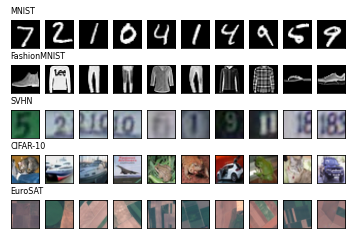

In [88]:
#tmp = dataset[1][0].numpy()
dataset_list = [dataset_MNIST, dataset_FashionMNIST, dataset_SVHN, dataset_CIFAR, dataset_EuroSAT]
plt.figure(figsize = (10, 12), dpi = 200)
fig, ax = plt.subplots(len(dataset_list), 10)
cnt = 0
for ds in dataset_list:
    for i in range(10):
        plt.subplot(len(dataset_list), 10, i + cnt + 1)
        tmp = ds[i][0].numpy()
        if tmp.shape[0] == 1:
            plt.imshow(tmp[0], cmap='gray')
        else:
            new_tmp = []
            for i in range(tmp.shape[1]):
                arr = []
                for j in range(tmp.shape[2]):
                    arr.append([tmp[0][i][j], tmp[1][i][j], tmp[2][i][j]])
                new_tmp.append(arr)
            new_tmp = np.array(new_tmp);
            plt.imshow(new_tmp, cmap = None)
        plt.xticks([])
        plt.yticks([])
    cnt += 10
ax[0, 0].set_title('MNIST', fontsize=8, loc='left')
ax[1, 0].set_title('FashionMNIST', fontsize=8, loc='left')
ax[2, 0].set_title('SVHN', fontsize=8, loc='left')
ax[3, 0].set_title('CIFAR-10', fontsize=8, loc='left')
ax[4, 0].set_title('EuroSAT', fontsize=8, loc='left')
plt.show()

fig.savefig('dataset.pdf', bbox_inches='tight', pad_inches=0.0)

In [55]:
pp = dataset_SVHN[0][0].numpy()
pp.shape[0]

3